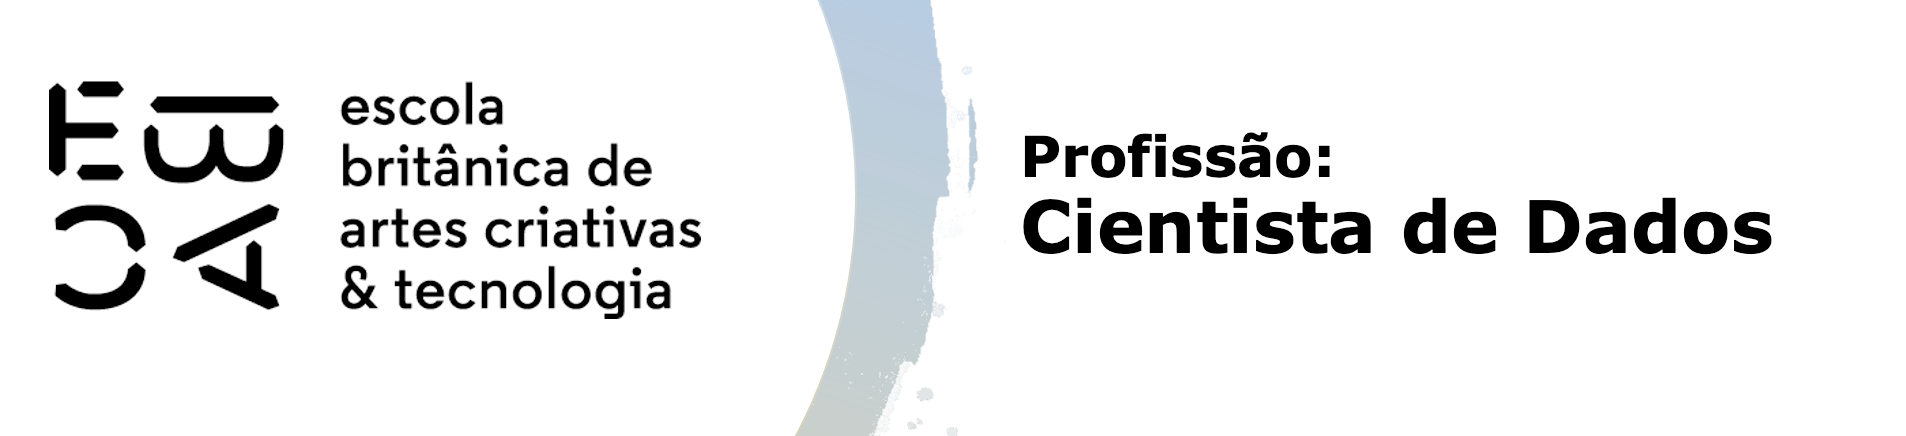

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [114]:
df = pd.read_csv('online_shoppers_intention.csv')

In [115]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [116]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

#### Precisamos entender a estrutura de dados e realizar o tratamento de dados nas respectivas colunas de interesse: BounceRates, ExitRates, Month, VisitorType, Weekend e Revenue.

In [117]:
# Verifcando valores únicos nas colunas de interesse
print(df['Month'].unique())
print(df['VisitorType'].unique())
print(df['Weekend'].unique())
print(df['Revenue'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']
[False  True]
[False  True]


In [118]:
# Mapear os meses para seus respectivos números
month_mapping = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['Month'] = df['Month'].map(month_mapping)

# Mapear os tipos de visitantes
visitor_mapping = {'New_Visitor': 1, 'Returning_Visitor': 2, 'Other': 0}
df['VisitorType'] = df['VisitorType'].map(visitor_mapping)

# Mapear os valores True e False para Weekend e Revenue
df['Weekend'] = df['Weekend'].map({True: 1, False: 2})
df['Revenue'] = df['Revenue'].map({True: 1, False: 2})

# Salvar o DataFrame transformado
df.to_csv('output/osi_tratado.csv', index=False)

In [119]:
# Carregando a base de dados tratada em um DataFrame
df_transformado = pd.read_csv('output/osi_tratado.csv')

# Visualizando as primeiras linhas:
df_transformado.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        2        2  
1        2       1            2            2        2        2  
2        1       9            3            2        2        2  
3        2       2            4            2        2        2  
4        3       1            4            2        1        2

In [120]:
### Análise descritiva resumida estatisticamente

print(df[['Month', 'VisitorType', 'Weekend', 'Revenue']].describe())

              Month   VisitorType       Weekend       Revenue
count  12330.000000  12330.000000  12330.000000  12330.000000
mean       7.651987      1.848824      1.767397      1.845255
std        3.392841      0.376989      0.422509      0.361676
min        2.000000      0.000000      1.000000      1.000000
25%        5.000000      2.000000      2.000000      2.000000
50%        7.000000      2.000000      2.000000      2.000000
75%       11.000000      2.000000      2.000000      2.000000
max       12.000000      2.000000      2.000000      2.000000


In [121]:
### Contagem de valores:

print(df['Month'].value_counts())
print(df['VisitorType'].value_counts())
print(df['Weekend'].value_counts())
print(df['Revenue'].value_counts())

Month
5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: count, dtype: int64
VisitorType
2    10551
1     1694
0       85
Name: count, dtype: int64
Weekend
2    9462
1    2868
Name: count, dtype: int64
Revenue
2    10422
1     1908
Name: count, dtype: int64


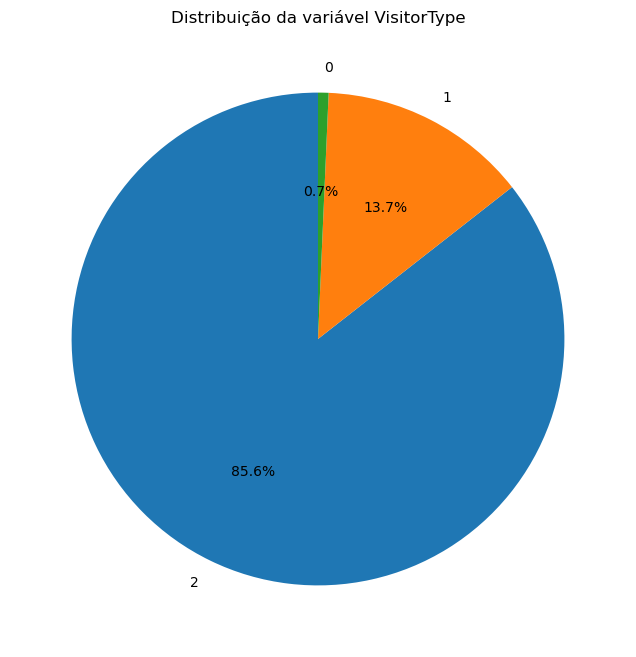

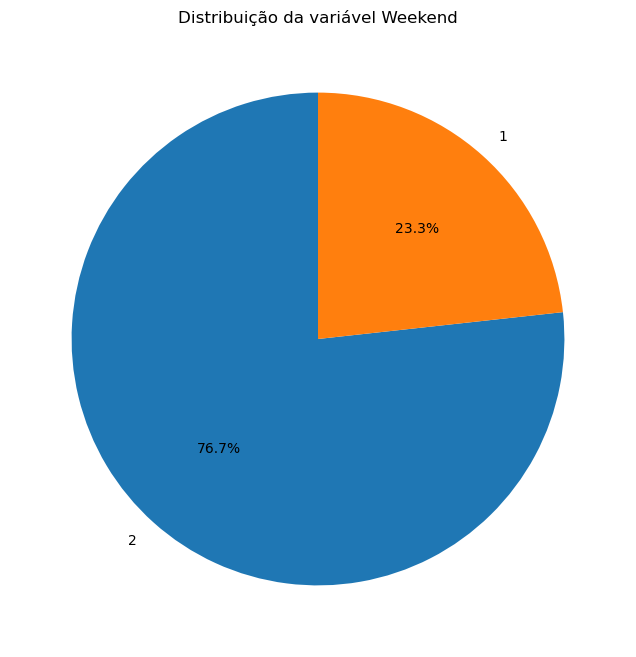

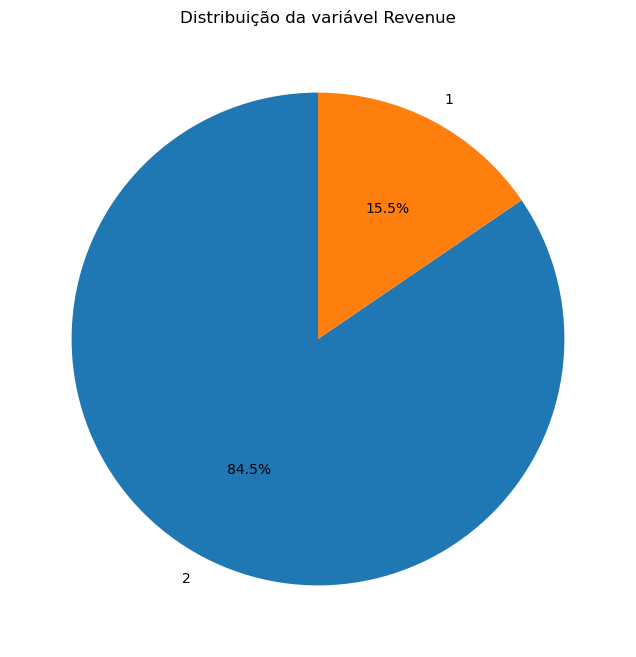

In [122]:
### Distribuição das variáveis

columns_to_plot = ['VisitorType', 'Weekend', 'Revenue']

for col in columns_to_plot:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=[str(i) for i in df[col].unique()])
    plt.title(f'Distribuição da variável {col}')
    plt.ylabel('')  # remover o nome da coluna para deixar mais limpo
    plt.show()

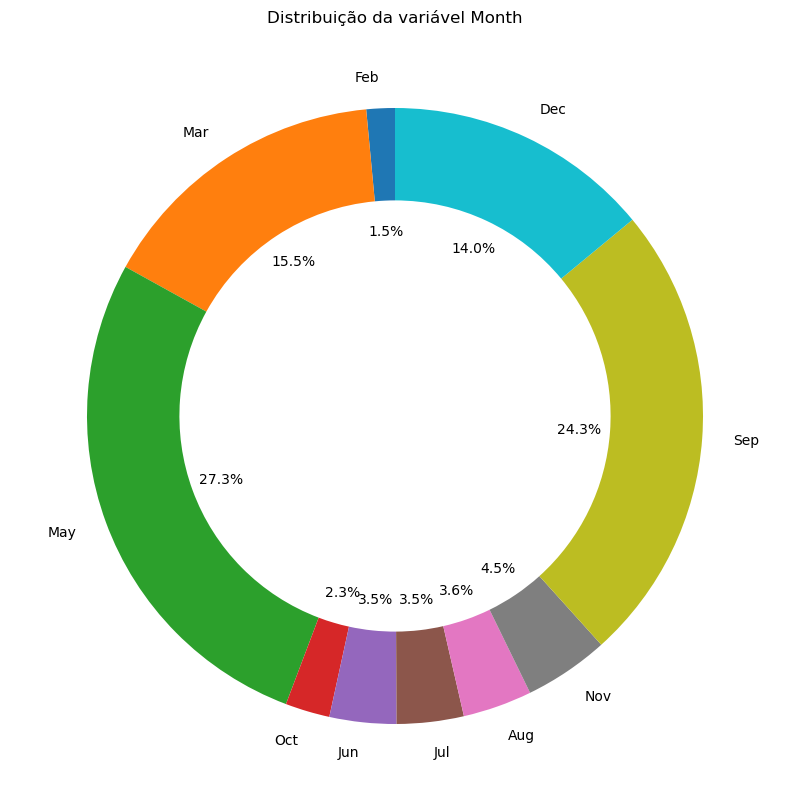

In [123]:
# Mapeamento reverso dos meses para exibir os nomes no gráfico

month_names = {
    2: 'Feb', 3: 'Mar', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

plt.figure(figsize=(10, 10))
df['Month'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=[month_names[i] for i in df['Month'].unique()],
    wedgeprops=dict(width=0.3)
)

plt.title('Distribuição da variável Month')
plt.ylabel('')  # removendo o nome da coluna para deixar mais limpo
plt.show()

In [124]:
# Verificando se exite algum valor NaN em todas as colunas do novo df
print(df.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

Método do Cotovelo: 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


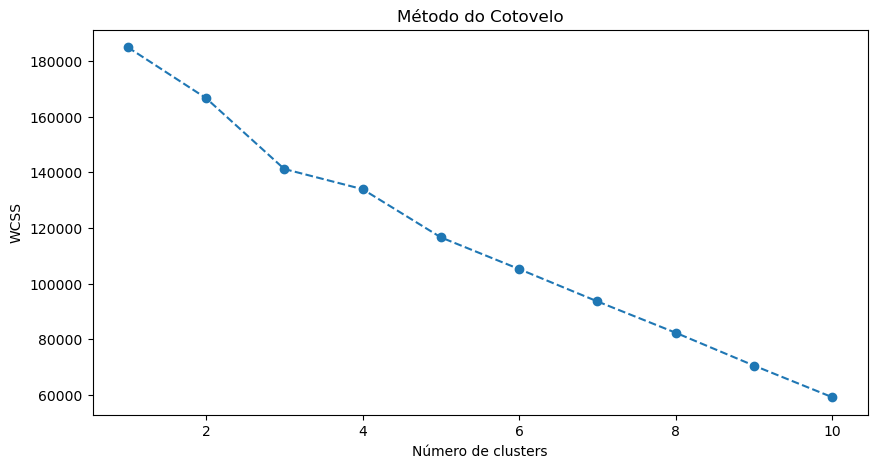

Método da Silhueta: 100%|██████████| 9/9 [00:23<00:00,  2.57s/it]


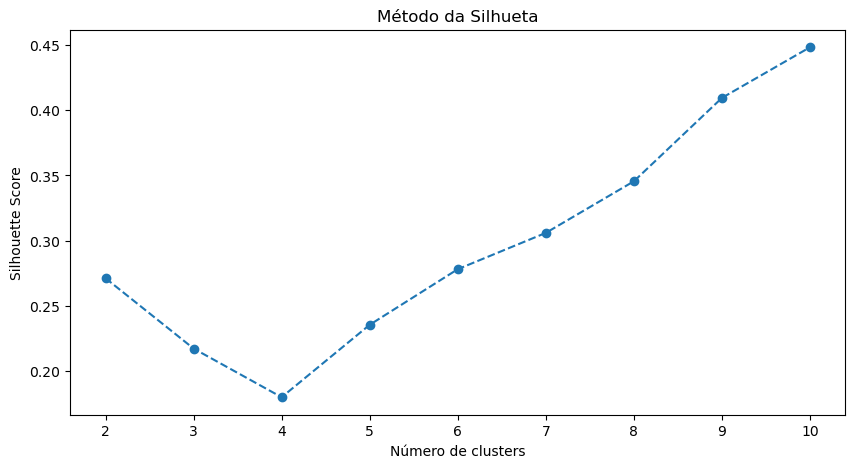

Tempo de execução: 30.05 segundos


In [126]:
# Selecionando as colunas de interesse
colunas_interesse = ['BounceRates', 'ExitRates', 'Month', 'VisitorType', 'Weekend', 'Revenue']

# Filtrando o conjunto de dados para incluir apenas as colunas de interesse
data_filtered = df_transformado[colunas_interesse]

# Como 'Month' e 'VisitorType' são categóricos, vamos transformá-los em numéricos
data_filtered = pd.get_dummies(data_filtered, columns=['Month', 'VisitorType'], drop_first=True)

# Padronizando as features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Iniciando o registro de tempo
start_time = time.time()

# Método do Cotovelo com barra de progresso
wcss = []
for i in tqdm(range(1, 11), desc="Método do Cotovelo"):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Método da Silhueta com barra de progresso
silhouette_scores = []
for n_cluster in tqdm(range(2, 11), desc="Método da Silhueta"):
    silhouette_scores.append(silhouette_score(data_scaled, KMeans(n_clusters=n_cluster, n_init=10).fit_predict(data_scaled)))

plt.figure(figsize=(10,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Método da Silhueta')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Exibir tempo de execução
elapsed_time = time.time() - start_time
print(f"Tempo de execução: {elapsed_time:.2f} segundos")

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

### Para avaliação dos grupos vamos considerar uma análise para 4 clusters e outra para 5 clusters.

In [130]:
# Executando KMeans com 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=42)
df_transformado['Cluster_4'] = kmeans_4.fit_predict(df_transformado)

# Análise descritiva para 4 clusters
descritiva_4 = df_transformado.groupby('Cluster_4').mean()

print("Análise Descritiva para 4 Clusters:")
descritiva_4

Análise Descritiva para 4 Clusters:


Administrative  Administrative_Duration  Informational  \
Cluster_4                                                           
0                1.742485                58.642288       0.305530   
1                6.779762               223.953448       2.300595   
2               14.700000              1558.196306       7.400000   
3                4.084488               149.341425       1.065713   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster_4                                                                    
0                       18.258085       17.415410               525.007329   
1                      193.628249      187.500000              8432.635203   
2                     1034.032500      512.400000             30277.952413   
3                       76.747295       68.563701              2895.766428   

           BounceRates  ExitRates  PageValues  SpecialDay     Month  \
Cluster_4                                                             
0             0.026126   0.048667    5.385032    0.064204  7.417359   
1             0.006190   0.019836    5.146564    0.034524  9.315476   
2             0.004505   0.018392    3.543312    0.000000  9.500000   
3             0.007529   0.022298    8.208298    0.053643  8.416182   

           OperatingSystems   Browser    Region  TrafficType  VisitorType  \
Cluster_4                                                                   
0                  2.122397  2.370781  3.161691     4.144147     1.822304   
1                  2.142857  2.309524  2.729167     3.523810     1.985119   
2                  1.900000  2.100000  1.500000     6.000000     2.000000   
3                  2.129191  2.305767  3.155118     3.818060     1.943228   

            Weekend   Revenue  
Cluster_4                      
0          1.765159  1.870422  
1          1.764881  1.660714  
2          1.900000  1.800000  
3          1.776933  1.763523

In [133]:
# Executando KMeans com 5 clusters
kmeans_5 = KMeans(n_clusters=5, n_init=10, random_state=42)
df_transformado['Cluster_5'] = kmeans_5.fit_predict(df_transformado)

# Análise descritiva para 5 clusters
descritiva_5 = df_transformado.groupby('Cluster_5').mean()

print("\nAnálise Descritiva para 5 Clusters:")
descritiva_5


Análise Descritiva para 5 Clusters:


Administrative  Administrative_Duration  Informational  \
Cluster_5                                                           
0                1.527560                48.848415       0.245688   
1                5.011547               182.185878       1.421478   
2                3.380840               125.899947       0.802017   
3               14.700000              1558.196306       7.400000   
4                7.106383               231.829698       2.558511   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster_5                                                                    
0                       13.360157       13.939814               374.297670   
1                      110.871342      102.743649              4539.046455   
2                       55.313493       46.730084              1851.600686   
3                     1034.032500      512.400000             30277.952413   
4                      230.654551      226.340426             10030.920828   

           BounceRates  ExitRates  PageValues  SpecialDay     Month  \
Cluster_5                                                             
0             0.029116   0.052801    4.643144    0.065589  7.359667   
1             0.006982   0.021457    7.777986    0.053811  8.918014   
2             0.008398   0.023796    8.914432    0.054118  7.976471   
3             0.004505   0.018392    3.543312    0.000000  9.500000   
4             0.006072   0.019964    4.396991    0.031915  9.478723   

           OperatingSystems   Browser    Region  TrafficType  VisitorType  \
Cluster_5                                                                   
0                  2.116753  2.365698  3.157038     4.196116     1.811724   
1                  2.137413  2.346420  3.035797     3.630485     1.971132   
2                  2.138151  2.338151  3.193950     3.872605     1.907563   
3                  1.900000  2.100000  1.500000     6.000000     2.000000   
4                  2.170213  2.340426  2.585106     3.526596     1.984043   

            Weekend   Revenue  Cluster_4  
Cluster_5                                 
0          1.770715  1.885177   0.000000  
1          1.767898  1.713626   2.658199  
2          1.759328  1.783866   1.531765  
3          1.900000  1.800000   2.000000  
4          1.739362  1.664894   1.000000

### Análise Descritiva para 4 Clusters:
- **Cluster 0:** Este grupo tem uma contagem moderada de visitas às páginas administrativas e relacionadas ao produto. O tempo gasto nessas páginas também é moderado. O BounceRate e ExitRates são um pouco mais altos do que em outros clusters, o que indica uma possível insatisfação ou desinteresse do usuário.<br><br>
- **Cluster 1:** Este cluster se destaca por ter um número significativamente maior de visitas a páginas administrativas e relacionadas ao produto e o usuário também gasta mais tempo nelas. Apesar disso, eles têm BounceRates e ExitRates mais baixos, sugerindo maior engajamento.<br><br>
- **Cluster 2:** Estes são visitantes de alto engajamento. Eles visitam muitas páginas e passam muito tempo no site. Seu BounceRate e ExitRates são os mais baixos entre os clusters.<br><br>
- **Cluster 3:** Similar ao Cluster 1, mas com contagens e durações ligeiramente menores em todas as categorias de página.

### Análise Descritiva para 5 Clusters:
- **Cluster 0:** Semelhante ao Cluster 0 da análise de 4 clusters, mas com números ligeiramente reduzidos.<br><br>
- **Cluster 1:** Visitantes com engajamento moderado. Eles têm contagens e durações mais baixas em comparação com o Cluster 2, mas mais altas do que o Cluster 0.<br><br>
- **Cluster 2:** Estes são visitantes de engajamento médio-baixo. Eles visitam menos páginas e passam menos tempo do que os do Cluster 1.<br><br>
- **Cluster 3:** Semelhante ao Cluster 2 da análise de 4 clusters. São visitantes de alto engajamento.<br><br>
- **Cluster 4:** Visitantes de alto engajamento, mas com contagens e durações ligeiramente menores do que o Cluster 3.

### Sugestão de nomes para 4 Clusters:
- Cluster 0: Engajamento Moderado
- Cluster 1: Alto Engajamento
- Cluster 2: Super Engajamento
- Cluster 3: Engajamento Moderado-Alto
### Sugestão de nomes para 5 Clusters:
- Cluster 0: Engajamento Baixo-Moderado
- Cluster 1: Engajamento Moderado
- Cluster 2: Engajamento Médio
- Cluster 3: Super Engajamento
- Cluster 4: Alto Engajamento

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

#### Bounce Rate:
- Quanto menor o Bounce Rate, melhor. Isso indica que os usuários estão explorando mais páginas no site, em vez de sair após a primeira página.
- Para ambas as segmentações (4 e 5 clusters), o Cluster 2 (Super Engajamento) tem o Bounce Rate mais baixo, o que é um excelente sinal.
#### Revenue:
- Baseado nos dados analisados, o Cluster 0 (Engajamento Baixo-Moderado) na segmentação de 5 clusters tem o Revenue mais alto, o que é interessante pois, apesar de terem um engajamento mais baixo, parecem ser mais propensos a comprar.

## Resumo
O **Cluster 0 (Engajamento Baixo-Moderado)** na segmentação de 5 clusters nesse caso pode ser a escolha, pois tem o maior valor de Revenue.<br><br>Porém, é importante notar que isso não significa que os outros clusters tenham menos valor.<br><br> Grupos com alto engajamento, como o Cluster 2 (Super Engajamento), são importantes para entender os usuários altamente engajados que podem ser um target (público-alvo) de marketing ou outras campanhas.